<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/SEW_DS_422_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
import io
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD


In [ ]:
path = 'https://github.com/SaraWestWA/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true'

In [ ]:
def load_quickdraw10(path):
  # use requests and BytesIO to access data
  response = requests.get(path)
  response.raise_for_status()
  data = np.load(io.BytesIO(response.content))

  # use target/y variable for stratification
  X = data['arr_0']
  y = data['arr_1']
  X_train,  X_test, y_train, y_test = train_test_split(X, y, #note sklearn variable order
                                                       test_size=0.2,
                                                       random_state=42,
                                                       shuffle=True,
                                                       stratify=y)

  # normalize data
  X_train = X_train / 255
  X_test = X_test / 255

  return X_train, y_train, X_test, y_test # standard variable order

In [ ]:
X_train, y_train, X_test, y_test = load_quickdraw10(path)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 784), (80000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [ ]:
lr = 0.01
opt = SGD(lr=lr)

def create_model(learning_rate=lr, optimizer=opt):
  model = Sequential() 

  model.add(Dense(units=64, input_dim=784, activation='relu', name='Input_Layer')) # Input layer = hidden layer 1
  model.add(Dense(units=32, activation='relu')) # HL 2
  model.add(Dense(units=10, activation='softmax')) # Output layer

  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model


In [ ]:
model_t = create_model(lr, opt)
model_t.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
b_size=8
lr = 0.01
opt = SGD(lr=lr)
model_8 = create_model(lr, opt)

# baseline holds the epoch information from the model
bt_8 = model_8.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 17s 2ms/step - loss: 1.0774 - accuracy: 0.6651 - val_loss: 0.6362 - val_accuracy: 0.8114
Epoch 2/20
10000/10000 [==============================] - 13s 1ms/step - loss: 0.6146 - accuracy: 0.8187 - val_loss: 0.5681 - val_accuracy: 0.8299
Epoch 3/20
10000/10000 [==============================] - 13s 1ms/step - loss: 0.5256 - accuracy: 0.8430 - val_loss: 0.5121 - val_accuracy: 0.8467
Epoch 4/20
10000/10000 [==============================] - 13s 1ms/step - loss: 0.4788 - accuracy: 0.8583 - val_loss: 0.4897 - val_accuracy: 0.8551
Epoch 5/20
10000/10000 [==============================] - 13s 1ms/step - loss: 0.4400 - accuracy: 0.8672 - val_loss: 0.4901 - val_accuracy: 0.8530
Epoch 6/20
10000/10000 [==============================] - 13s 1ms/step - loss: 0.4187 - accuracy: 0.8741 - val_loss: 0.4710 - val_accuracy: 0.8587
Epoch 7/20
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3991 - accuracy: 0.8820 - val_loss: 0

In [ ]:
b_size=16
lr = 0.01
opt = SGD(lr=lr)
model_16 = create_model(lr, opt)

# baseline holds the epoch information from the model
bt_16 = model_16.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
5000/5000 [==============================] - 7s 1ms/step - loss: 1.2112 - accuracy: 0.6270 - val_loss: 0.7026 - val_accuracy: 0.7936
Epoch 2/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6844 - accuracy: 0.7975 - val_loss: 0.6047 - val_accuracy: 0.8205
Epoch 3/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.5920 - accuracy: 0.8241 - val_loss: 0.5665 - val_accuracy: 0.8296
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.5388 - accuracy: 0.8376 - val_loss: 0.5349 - val_accuracy: 0.8411
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4997 - accuracy: 0.8508 - val_loss: 0.5096 - val_accuracy: 0.8481
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4707 - accuracy: 0.8579 - val_loss: 0.5131 - val_accuracy: 0.8460
Epoch 7/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4544 - accuracy: 0.8650 - val_loss: 0.4857 - val_accuracy:

In [ ]:
b_size=32
lr = 0.01
opt = SGD(lr=lr)
model_32 = create_model(lr, opt)

# baseline holds the epoch information from the model
bt_32 = model_32.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.5009 - accuracy: 0.5039 - val_loss: 0.8278 - val_accuracy: 0.7576
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7994 - accuracy: 0.7700 - val_loss: 0.7142 - val_accuracy: 0.7896
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7024 - accuracy: 0.7945 - val_loss: 0.6519 - val_accuracy: 0.8069
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6505 - accuracy: 0.8085 - val_loss: 0.6104 - val_accuracy: 0.8199
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5885 - accuracy: 0.8255 - val_loss: 0.5810 - val_accuracy: 0.8284
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5525 - accuracy: 0.8375 - val_loss: 0.5528 - val_accuracy: 0.8366
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5325 - accuracy: 0.8427 - val_loss: 0.5354 - val_accuracy:

In [ ]:
b_size=64
lr = 0.01
model_64 = create_model(lr, opt)

# baseline holds the epoch information from the model
bt_64 = model_64.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7223 - accuracy: 0.4358 - val_loss: 0.9054 - val_accuracy: 0.7326
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8833 - accuracy: 0.7387 - val_loss: 0.8005 - val_accuracy: 0.7628
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7885 - accuracy: 0.7686 - val_loss: 0.7433 - val_accuracy: 0.7806
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7447 - accuracy: 0.7809 - val_loss: 0.7079 - val_accuracy: 0.7909
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7072 - accuracy: 0.7947 - val_loss: 0.6738 - val_accuracy: 0.8001
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6680 - accuracy: 0.8053 - val_loss: 0.6499 - val_accuracy: 0.8068
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6380 - accuracy: 0.8130 - val_loss: 0.6247 - val_accuracy:

In [ ]:
b_size=128
lr = 0.01
opt = SGD(lr=lr)
model_128 = create_model(lr, opt)

# baseline holds the epoch information from the model
bt_128 = model_128.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 1.8706 - accuracy: 0.3879 - val_loss: 1.1152 - val_accuracy: 0.6597
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 1.0655 - accuracy: 0.6779 - val_loss: 0.9287 - val_accuracy: 0.7179
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.9236 - accuracy: 0.7266 - val_loss: 0.8595 - val_accuracy: 0.7429
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.8637 - accuracy: 0.7428 - val_loss: 0.8193 - val_accuracy: 0.7569
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.8281 - accuracy: 0.7546 - val_loss: 0.7896 - val_accuracy: 0.7671
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.7927 - accuracy: 0.7670 - val_loss: 0.7683 - val_accuracy: 0.7747
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.7743 - accuracy: 0.7740 - val_loss: 0.7440 - val_accuracy: 0.7831
Epoch 

In [ ]:
b_size=256
lr = 0.01
opt = SGD(lr=lr)
model_256 = create_model(lr, opt)

# baseline holds the epoch information from the model
bt_256 = model_256.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 2.1320 - accuracy: 0.2434 - val_loss: 1.4940 - val_accuracy: 0.5165
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.3865 - accuracy: 0.5651 - val_loss: 1.1554 - val_accuracy: 0.6446
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 1.1318 - accuracy: 0.6542 - val_loss: 1.0254 - val_accuracy: 0.6901
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 1.0096 - accuracy: 0.6935 - val_loss: 0.9466 - val_accuracy: 0.7205
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.9449 - accuracy: 0.7182 - val_loss: 0.8951 - val_accuracy: 0.7332
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.9020 - accuracy: 0.7348 - val_loss: 0.8616 - val_accuracy: 0.7459
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.8632 - accuracy: 0.7457 - val_loss: 0.8349 - val_accuracy: 0.7523
Epoch 

In [ ]:
print(model_8.evaluate(X_test, y_test))
print(model_16.evaluate(X_test, y_test))
print(model_32.evaluate(X_test, y_test))
print(model_64.evaluate(X_test, y_test))
print(model_128.evaluate(X_test, y_test))
print(model_256.evaluate(X_test, y_test))

625/625 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.8569
[0.5291475057601929, 0.8568999767303467]
625/625 [==============================] - 1s 1ms/step - loss: 0.4837 - accuracy: 0.8611
[0.4837094843387604, 0.8611000180244446]
625/625 [==============================] - 1s 1ms/step - loss: 0.4741 - accuracy: 0.8630
[0.4740753769874573, 0.8629500269889832]
625/625 [==============================] - 1s 2ms/step - loss: 0.5139 - accuracy: 0.8490
[0.5139234662055969, 0.8489500284194946]
625/625 [==============================] - 1s 1ms/step - loss: 0.5933 - accuracy: 0.8258
[0.59331214427948, 0.8258000016212463]
625/625 [==============================] - 1s 1ms/step - loss: 0.6828 - accuracy: 0.7989
[0.6827924847602844, 0.7989000082015991]


(0.5, 1.0)

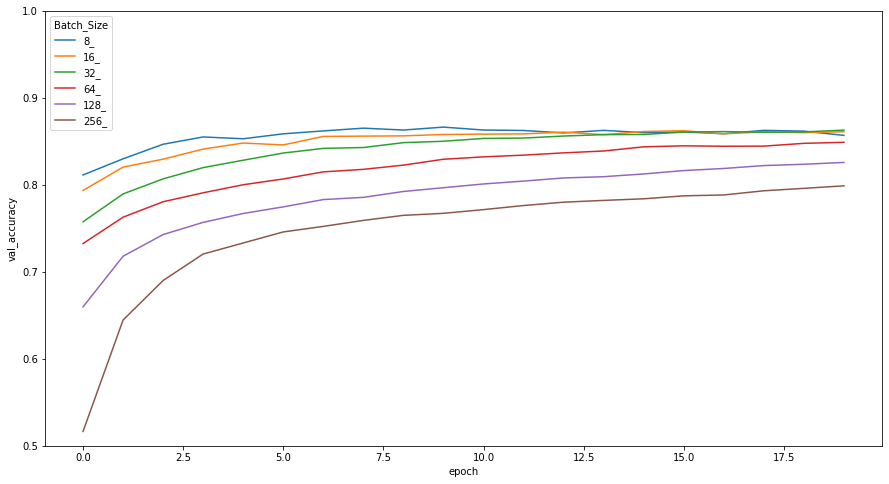

In [ ]:
# Create visualizer
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

batch_size=[]

for exp, result in zip([bt_8, bt_16, bt_32, bt_64, bt_128, bt_256],['8_','16_','32_','64_','128_','256_']):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch_Size'] = result
  batch_size.append(df)

df=pd.concat(batch_size)
df['Batch_Size'] = df['Batch_Size'].astype('str')

# Plot
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Batch_Size', data=df);
ax.axes.set_ylim(0.5,1)

(0.3, 1.6)

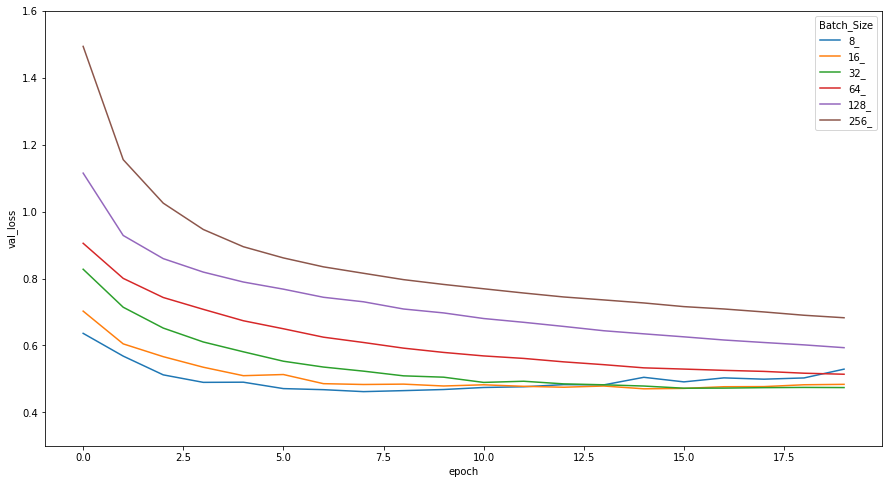

In [ ]:
batch_size=[]

for exp, result in zip([bt_8, bt_16, bt_32, bt_64, bt_128, bt_256],['8_','16_','32_','64_','128_','256_']):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch_Size'] = result
  batch_size.append(df)

df=pd.concat(batch_size)
df['Batch_Size'] = df['Batch_Size'].astype('str')

# Plot
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='epoch', y='val_loss', hue='Batch_Size', data=df);
ax.axes.set_ylim(0.3, 1.6)

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:
lr = 1
opt=SGD(lr=lr)
b_size=32
model_1 = create_model(lr, opt)

# baseline holds the epoch information from the model
lr_1 = model_1.fit(X_train, y_train,
                epochs=15,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3304 - accuracy: 0.1043 - val_loss: 2.3106 - val_accuracy: 0.1000
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3109 - accuracy: 0.1020 - val_loss: 2.3143 - val_accuracy: 0.1000
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3100 - accuracy: 0.0979 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3101 - accuracy: 0.0991 - val_loss: 2.3100 - val_accuracy: 0.1000
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3104 - accuracy: 0.0996 - val_loss: 2.3153 - val_accuracy: 0.1000
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3100 - accuracy: 0.0974 - val_loss: 1.9566 - val_accuracy: 0.2528
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4270 - accuracy: 0.4791 - val_loss: 1.0258 - val_accuracy:

In [ ]:
lr = .1
opt=SGD(lr=lr)
b_size=32
model_pt_1 = create_model(lr, opt)

# baseline holds the epoch information from the model
lr_pt_1 = model_pt_1.fit(X_train, y_train,
                epochs=15,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9545 - accuracy: 0.6969 - val_loss: 0.5570 - val_accuracy: 0.8286
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5420 - accuracy: 0.8367 - val_loss: 0.4948 - val_accuracy: 0.8493
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4771 - accuracy: 0.8567 - val_loss: 0.4896 - val_accuracy: 0.8518
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4352 - accuracy: 0.8674 - val_loss: 0.4858 - val_accuracy: 0.8538
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8747 - val_loss: 0.4779 - val_accuracy: 0.8576
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3898 - accuracy: 0.8799 - val_loss: 0.4896 - val_accuracy: 0.8543
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3702 - accuracy: 0.8869 - val_loss: 0.4636 - val_accuracy:

In [ ]:
lr = .01
opt=SGD(lr=lr)
b_size=32
model_pt_01 = create_model(lr, opt)

# baseline holds the epoch information from the model
lr_pt_01 = model_pt_01.fit(X_train, y_train,
                epochs=15,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3824 - accuracy: 0.5644 - val_loss: 0.8189 - val_accuracy: 0.7580
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7961 - accuracy: 0.7688 - val_loss: 0.7171 - val_accuracy: 0.7897
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7037 - accuracy: 0.7949 - val_loss: 0.6548 - val_accuracy: 0.8090
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6426 - accuracy: 0.8121 - val_loss: 0.6188 - val_accuracy: 0.8187
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6038 - accuracy: 0.8220 - val_loss: 0.5886 - val_accuracy: 0.8278
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.8324 - val_loss: 0.5685 - val_accuracy: 0.8319
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5421 - accuracy: 0.8395 - val_loss: 0.5470 - val_accuracy:

In [ ]:
lr = .001
opt=SGD(lr=lr)
b_size=32
model_pt_001 = create_model(lr, opt)

# baseline holds the epoch information from the model
lr_pt_001 = model_pt_001.fit(X_train, y_train,
                epochs=15,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.1988 - accuracy: 0.2151 - val_loss: 1.6193 - val_accuracy: 0.5242
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4886 - accuracy: 0.5565 - val_loss: 1.2131 - val_accuracy: 0.6313
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1858 - accuracy: 0.6407 - val_loss: 1.0711 - val_accuracy: 0.6769
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0612 - accuracy: 0.6800 - val_loss: 0.9899 - val_accuracy: 0.7064
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9959 - accuracy: 0.7032 - val_loss: 0.9365 - val_accuracy: 0.7229
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9439 - accuracy: 0.7214 - val_loss: 0.9010 - val_accuracy: 0.7333
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9145 - accuracy: 0.7302 - val_loss: 0.8743 - val_accuracy:

In [ ]:
lr = .0001
opt=SGD(lr=lr)
b_size=32
model_pt_0001 = create_model(lr, opt)

# baseline holds the epoch information from the model
lr_pt_0001 = model_pt_0001.fit(X_train, y_train,
                epochs=15,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/15
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3655 - accuracy: 0.1339 - val_loss: 2.2843 - val_accuracy: 0.1590
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.2703 - accuracy: 0.1696 - val_loss: 2.2229 - val_accuracy: 0.2048
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.2107 - accuracy: 0.2188 - val_loss: 2.1644 - val_accuracy: 0.2689
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.1511 - accuracy: 0.2854 - val_loss: 2.0987 - val_accuracy: 0.3399
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.0839 - accuracy: 0.3488 - val_loss: 2.0250 - val_accuracy: 0.3961
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.0077 - accuracy: 0.4032 - val_loss: 1.9465 - val_accuracy: 0.4356
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.9305 - accuracy: 0.4383 - val_loss: 1.8661 - val_accuracy:

In [ ]:
print(model_1.evaluate(X_test, y_test))
print(model_pt_1.evaluate(X_test, y_test))
print(model_pt_01.evaluate(X_test, y_test))
print(model_pt_001.evaluate(X_test, y_test))
print(model_pt_0001.evaluate(X_test, y_test))

625/625 [==============================] - 1s 1ms/step - loss: 1.9350 - accuracy: 0.2392
[1.9350179433822632, 0.2391500025987625]
625/625 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.8601
[0.4996570348739624, 0.8601499795913696]
625/625 [==============================] - 1s 1ms/step - loss: 0.4842 - accuracy: 0.8572
[0.4841691553592682, 0.8572499752044678]
625/625 [==============================] - 1s 1ms/step - loss: 0.7655 - accuracy: 0.7768
[0.7655407190322876, 0.7767500281333923]
625/625 [==============================] - 1s 1ms/step - loss: 1.3366 - accuracy: 0.6051
[1.3366423845291138, 0.6050999760627747]


(0.0, 1.0)

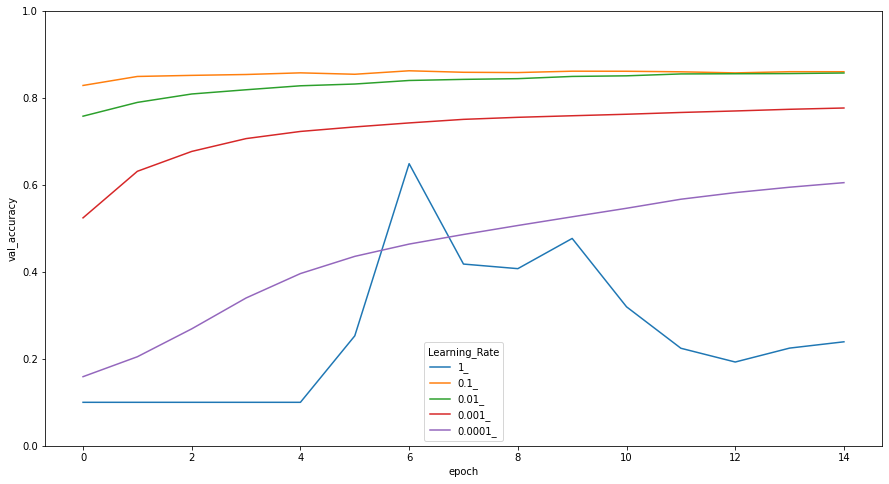

In [ ]:
# Create visualizer
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

learning_rate=[]

for exp, result in zip([lr_1, lr_pt_1, lr_pt_01, lr_pt_001, lr_pt_0001],['1_','0.1_','0.01_','0.001_','0.0001_']):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning_Rate'] = result
  learning_rate.append(df)

df=pd.concat(learning_rate)
df['Learning_Rate'] = df['Learning_Rate'].astype('str')

# Plot
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Learning_Rate', data=df);
ax.axes.set_ylim(0,1)

(0.3, 3.0)

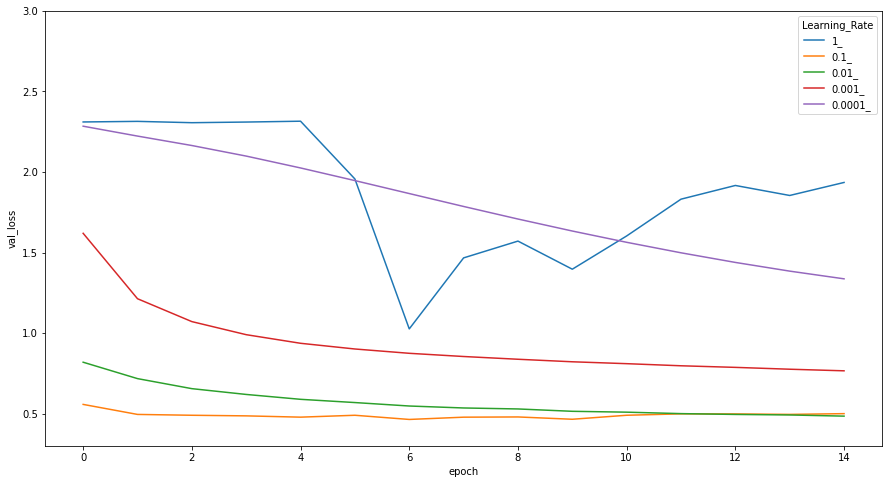

In [ ]:
learning_rate=[]

for exp, result in zip([lr_1, lr_pt_1, lr_pt_01, lr_pt_001, lr_pt_0001],['1_','0.1_','0.01_','0.001_','0.0001_']):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning_Rate'] = result
  learning_rate.append(df)

df=pd.concat(learning_rate)
df['Learning_Rate'] = df['Learning_Rate'].astype('str')

# Plot
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='epoch', y='val_loss', hue='Learning_Rate', data=df);
ax.axes.set_ylim(0.3,3)

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
lr = .1
opt='adam'
b_size=32
model_adam = create_model(lr, opt)

# baseline holds the epoch information from the model
model_b = model_adam.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))


Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9086 - accuracy: 0.7205 - val_loss: 0.5523 - val_accuracy: 0.8359
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5349 - accuracy: 0.8406 - val_loss: 0.5162 - val_accuracy: 0.8462
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4699 - accuracy: 0.8593 - val_loss: 0.4815 - val_accuracy: 0.8579
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4273 - accuracy: 0.8711 - val_loss: 0.4780 - val_accuracy: 0.8589
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3975 - accuracy: 0.8822 - val_loss: 0.4884 - val_accuracy: 0.8531
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3812 - accuracy: 0.8861 - val_loss: 0.4827 - val_accuracy: 0.8576
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3602 - accuracy: 0.8915 - val_loss: 0.4826 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import Adamax

lr = .1
opt='adamax'
b_size=32
model_adamax = create_model(lr, opt)

# baseline holds the epoch information from the model
model_c = model_adamax.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0970 - accuracy: 0.6623 - val_loss: 0.6912 - val_accuracy: 0.7975
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6787 - accuracy: 0.8016 - val_loss: 0.6133 - val_accuracy: 0.8195
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6002 - accuracy: 0.8252 - val_loss: 0.5724 - val_accuracy: 0.8322
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5491 - accuracy: 0.8375 - val_loss: 0.5426 - val_accuracy: 0.8417
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5066 - accuracy: 0.8515 - val_loss: 0.5247 - val_accuracy: 0.8465
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4842 - accuracy: 0.8590 - val_loss: 0.5205 - val_accuracy: 0.8461
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4643 - accuracy: 0.8636 - val_loss: 0.4994 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import Nadam

lr = .1
opt='nadam'
b_size=32
model_nadam = create_model(lr, opt)

# baseline holds the epoch information from the model
model_d = model_nadam.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9211 - accuracy: 0.7167 - val_loss: 0.5620 - val_accuracy: 0.8331
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5285 - accuracy: 0.8436 - val_loss: 0.5082 - val_accuracy: 0.8472
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4552 - accuracy: 0.8639 - val_loss: 0.4851 - val_accuracy: 0.8561
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4221 - accuracy: 0.8734 - val_loss: 0.4699 - val_accuracy: 0.8618
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3905 - accuracy: 0.8828 - val_loss: 0.4775 - val_accuracy: 0.8598
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3734 - accuracy: 0.8885 - val_loss: 0.4750 - val_accuracy: 0.8598
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3527 - accuracy: 0.8942 - val_loss: 0.4828 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import Adagrad

lr = .1
opt='adagrad'
b_size=32
model_adagrad = create_model(lr, opt)

# baseline holds the epoch information from the model
model_e = model_adagrad.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9592 - accuracy: 0.3328 - val_loss: 1.2490 - val_accuracy: 0.6202
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1988 - accuracy: 0.6395 - val_loss: 1.0656 - val_accuracy: 0.6798
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0515 - accuracy: 0.6863 - val_loss: 0.9915 - val_accuracy: 0.7066
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9960 - accuracy: 0.7068 - val_loss: 0.9482 - val_accuracy: 0.7211
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9469 - accuracy: 0.7247 - val_loss: 0.9176 - val_accuracy: 0.7298
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9179 - accuracy: 0.7356 - val_loss: 0.8939 - val_accuracy: 0.7401
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8930 - accuracy: 0.7416 - val_loss: 0.8755 - val_accuracy:

In [ ]:
# best model a option
lr = .1
opt='sgd'
b_size=32
model_a_best = create_model(lr, opt)

# baseline holds the epoch information from the model
model_a_best_history = model_a_best.fit(X_train, y_train,
                epochs=20,
                batch_size=b_size,
                validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4264 - accuracy: 0.5393 - val_loss: 0.8113 - val_accuracy: 0.7631
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7930 - accuracy: 0.7698 - val_loss: 0.7207 - val_accuracy: 0.7864
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7026 - accuracy: 0.7954 - val_loss: 0.6606 - val_accuracy: 0.8031
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6451 - accuracy: 0.8092 - val_loss: 0.6226 - val_accuracy: 0.8136
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6087 - accuracy: 0.8200 - val_loss: 0.5940 - val_accuracy: 0.8224
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5708 - accuracy: 0.8299 - val_loss: 0.5792 - val_accuracy: 0.8253
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5393 - accuracy: 0.8418 - val_loss: 0.5553 - val_accuracy:

In [ ]:
print(model_adam.evaluate(X_test, y_test))
print(model_adamax.evaluate(X_test, y_test))
print(model_nadam.evaluate(X_test, y_test))
print(model_adagrad.evaluate(X_test, y_test))
print(model_a_best.evaluate(X_test, y_test))

625/625 [==============================] - 1s 1ms/step - loss: 0.5795 - accuracy: 0.8529
[0.5795109868049622, 0.8529000282287598]
625/625 [==============================] - 1s 1ms/step - loss: 0.4872 - accuracy: 0.8604
[0.4871531128883362, 0.8604000210762024]
625/625 [==============================] - 1s 1ms/step - loss: 0.5912 - accuracy: 0.8517
[0.5911949872970581, 0.8517000079154968]
625/625 [==============================] - 1s 1ms/step - loss: 0.7636 - accuracy: 0.7784
[0.7635509371757507, 0.7784000039100647]
625/625 [==============================] - 1s 1ms/step - loss: 0.4733 - accuracy: 0.8626
[0.4733392596244812, 0.8626000285148621]


(0.8, 0.9)

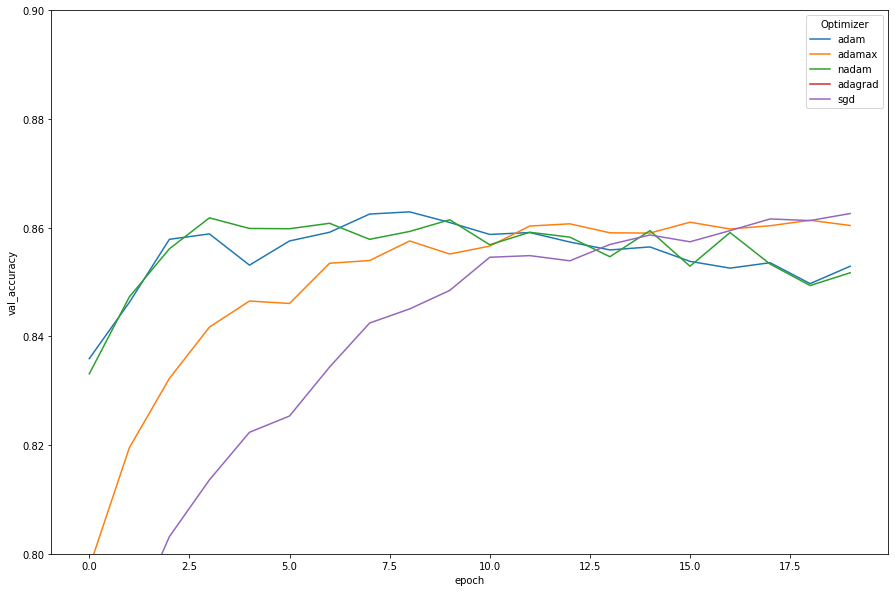

In [ ]:
# Create visualizer
optimizers=[]

for exp, result in zip([model_b, model_c, model_d, model_e, model_a_best_history],['adam', 'adamax', 'nadam','adagrad', 'sgd']):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Optimizer'] = result
  optimizers.append(df)

df=pd.concat(optimizers)
df['Optimizer'] = df['Optimizer'].astype('str')

# Plot
plt.figure(figsize=(15,10))
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);
ax.axes.set_ylim(.8, .9)

(0.0, 1.5)

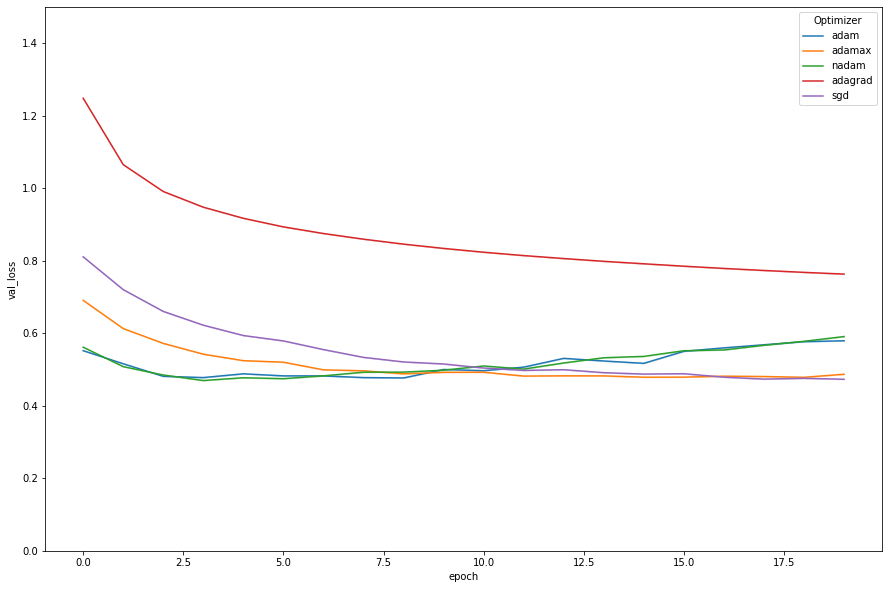

In [ ]:
for exp, result in zip([model_b, model_c, model_d, model_e, model_a_best_history],['adam', 'adamax', 'nadam','adagrad', 'sgd']):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Optimizer'] = result
  optimizers.append(df)

df=pd.concat(optimizers)
df['Optimizer'] = df['Optimizer'].astype('str')

# Plot
plt.figure(figsize=(15,10))
ax = sns.lineplot(x='epoch', y='val_loss', hue='Optimizer', data=df);
ax.axes.set_ylim(0, 1.5)

##Analysis all together in one place
4.2.1  baseline models:
Units: 128, 64, 10
Epochs: 30

SGD
Accuracy: 0.8858
Loss: 0.397
Epochs: 10
Learning rate: default, 0.01
Seconds per epoch: 5-6

ADAM
Accuracy: 0.9547
Loss: 0.267
Epochs: 3
Batch size: 32
Learning rate: default, 0.001
Seconds per epoch: 5-6

4.2.2 models:
Batch size testing:
Model: SGD
Units: 64, 32, 10
Epochs: 20
Batch size: 8, 16, 32, 64, 128, 256
Learning rate: 0.01

For the batch size test models accuracy ranged from 0.799 to 0.857, with losses from 0.683 to 0.474. As batch size increased the time per epoch decreased from 14 down to 1 second. The model with provided the best outcome was at batch size 32, which trained at 4 s per epoch. The loss was 0.474, and the accuracy 0.8630. The baseline model which took 5-6 seconds per epoch to run, was over 0.02 more accurate and with a loss better by 0.077. 

4.2.2 models:
Learning rate testing:
Model: SGD
Units: 64, 32, 10
Epochs: 20
Batch size: 32
Learning rate: 1,  0.1,  0.01,  0.001,  0.0001

The best learning rate proved to be 0.1. All models took about 4 seconds per epoch to train. The 0.1 model began with higher accuracy and lower loss than the other models. The 0.01 and 0.1 models were very close in outcomes and further testing could be useful. Again, the SGD model from yesterday with larger units resulted in better outcomes, but took longer to run. The spectrum of results was much larger with learning rates than with batch size, accuracy ranged from 0.239 to 0.860, and loss ranged from 1.94 to 0.484.




4.2.2 models:
Optimizers
Units: 64, 32, 10
Epochs: 20
Batch size: 32
Learning rate: 0.1

The optimizers tested all used default settings except as noted above. The model which performed the best for my last iteration was the SGD model using the parameters above. It was just 0.002 more accurate with loss 0.014 better than the adamax model. However, the performance of the baseline ADAM model with larger units 0.092 more accurate with 0.206 better on loss. In addition, the various optimizers often changed top position. However, time limits further examination.

Overall, in my experiments, larger unit sizes result in more accurate models, with less loss, but they take longer to run.




### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
First a random set of weights for the connections between nodes is selected.
Next the model is run with these rates for a epoch and the results are compared to the actual outcomes.
The weights are now adjusted by working backward from the loss and accuracy numbers of that epoch, and another epoch is run.
The best stopping place for a model with given parameters is when both the accuracy and the loss are at a minimum.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


